In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel("Soil composition.xlsx", index_col=None)
df

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label
0,143,69,217,5.9,0.58,0.23000,10.20,116.35,59.96,54.85,21.29,pomegranate
1,170,36,216,5.9,0.15,0.28000,15.69,114.20,56.87,31.28,28.62,pomegranate
2,158,66,219,6.8,0.34,0.20000,15.29,65.87,51.81,57.12,27.59,pomegranate
3,133,45,207,6.4,0.94,0.21000,8.48,103.10,43.81,68.50,47.29,pomegranate
4,132,48,218,6.7,0.54,0.19000,5.59,63.40,56.40,46.71,31.04,pomegranate
...,...,...,...,...,...,...,...,...,...,...,...,...
615,41,23,135,5.0,1.67,0.10655,26.00,39.20,206.89,31.09,20.64,potato
616,49,45,90,5.8,1.98,0.09229,19.00,40.20,91.12,32.68,14.91,potato
617,131,24,121,4.9,2.24,0.08775,22.00,40.00,94.34,24.93,23.74,potato
618,131,55,130,5.3,2.48,0.08983,15.00,41.00,92.58,45.73,21.48,potato


#### Lets get some basic information about the datset

In [6]:
df.shape

(620, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       620 non-null    int64  
 1   P       620 non-null    int64  
 2   K       620 non-null    int64  
 3   ph      620 non-null    float64
 4   EC      620 non-null    float64
 5   S       620 non-null    float64
 6   Cu      620 non-null    float64
 7   Fe      620 non-null    float64
 8   Mn      620 non-null    float64
 9   Zn      620 non-null    float64
 10  B       620 non-null    float64
 11  label   620 non-null    object 
dtypes: float64(8), int64(3), object(1)
memory usage: 58.3+ KB


In [10]:
df.describe()

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,135.701613,52.508065,161.401613,6.106290,0.885468,0.484085,17.315452,117.212500,219.905887,34.340839,28.750710
std,31.808083,24.673538,81.285780,0.693782,0.637214,5.775388,6.441150,62.775199,341.998793,11.543871,19.636447
min,30.000000,10.000000,51.000000,4.500000,0.010000,0.011100,0.180000,3.810000,20.580000,17.990000,1.020000
25%,116.000000,30.000000,89.000000,5.700000,0.297500,0.086000,12.592500,68.312500,58.785000,24.727500,13.442500
50%,138.000000,54.000000,157.500000,6.100000,0.780000,0.168000,16.910000,108.245000,73.580000,31.425000,23.225000
75%,160.000000,75.000000,206.000000,6.500000,1.390000,0.240000,21.102500,155.620000,163.665000,43.542500,42.767500
max,198.000000,100.000000,369.000000,8.000000,2.480000,113.200000,35.000000,276.720000,1572.540000,70.000000,74.560000


In [12]:
df.isnull().sum()

N        0
P        0
K        0
ph       0
EC       0
S        0
Cu       0
Fe       0
Mn       0
Zn       0
B        0
label    0
dtype: int64

#### Since the dataset has no null values, we will proceed with some visualisations to get insights on soil composition

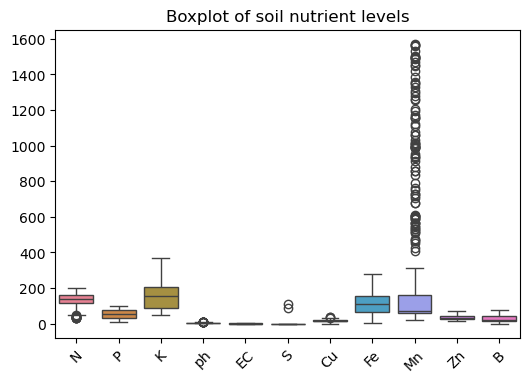

In [32]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.boxplot(data=df.drop('label', axis=1))
plt.title("Boxplot of soil nutrient levels")
plt.xticks(rotation=45)
plt.show()

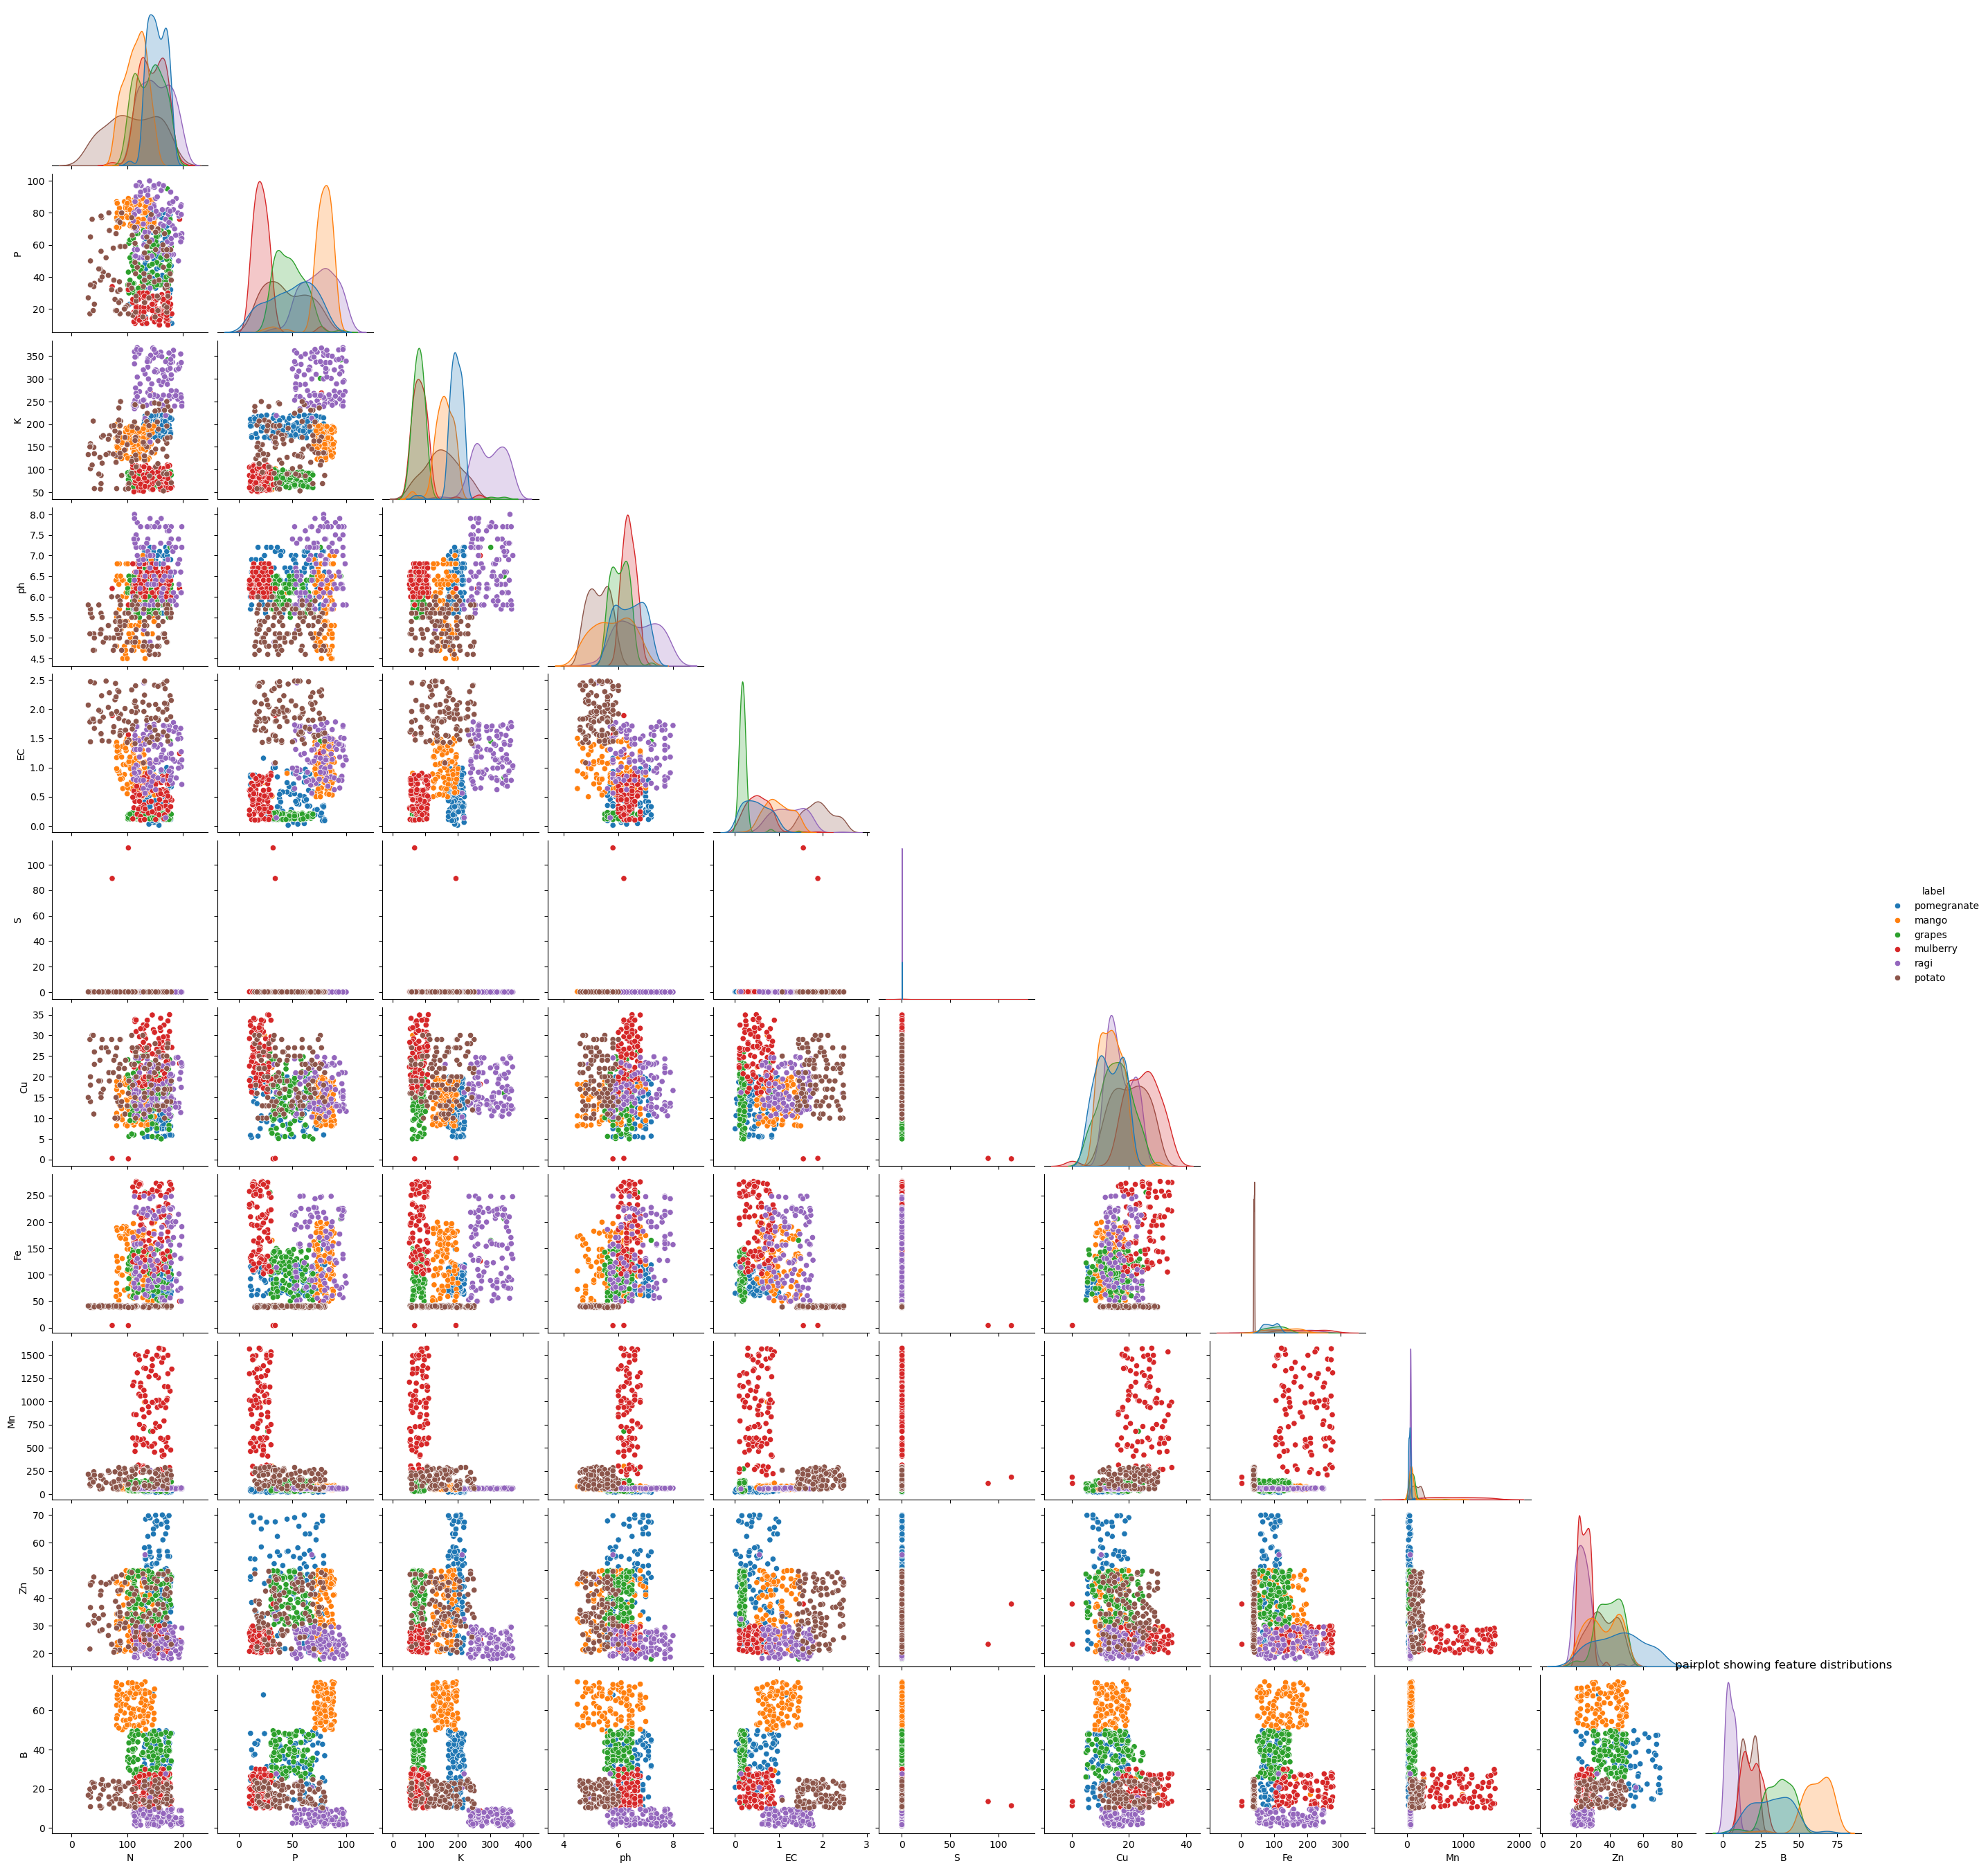

In [49]:
sns.pairplot(df, hue='label', kind = 'scatter', corner=True)
plt.title("pairplot showing feature distributions")
plt.show()

#### Both the Boxplot and Pair show outliers in distribution of Manganese and Sulfur compared to other nutrinets in most crops. Phosphorous, Nitrogen and Copper are present in all crops

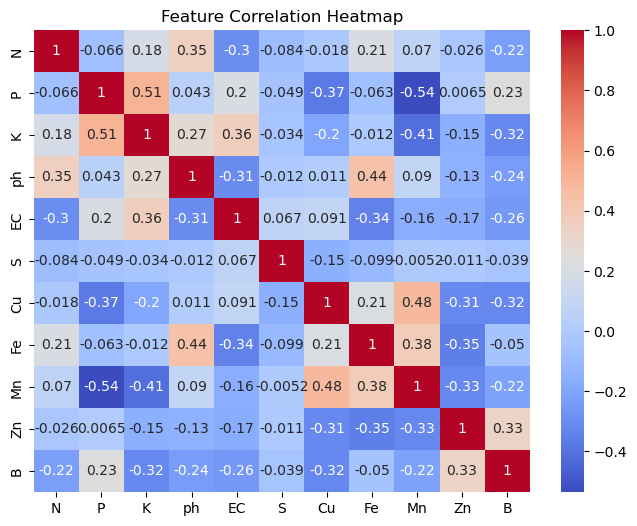

In [27]:
plt.figure(figsize=(8,6))
corr = df.drop('label', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

#### The heatmap show positive correlation between Phosphorus(P)/Potassium(K), Copper(Cu)/Manganese(Mn)

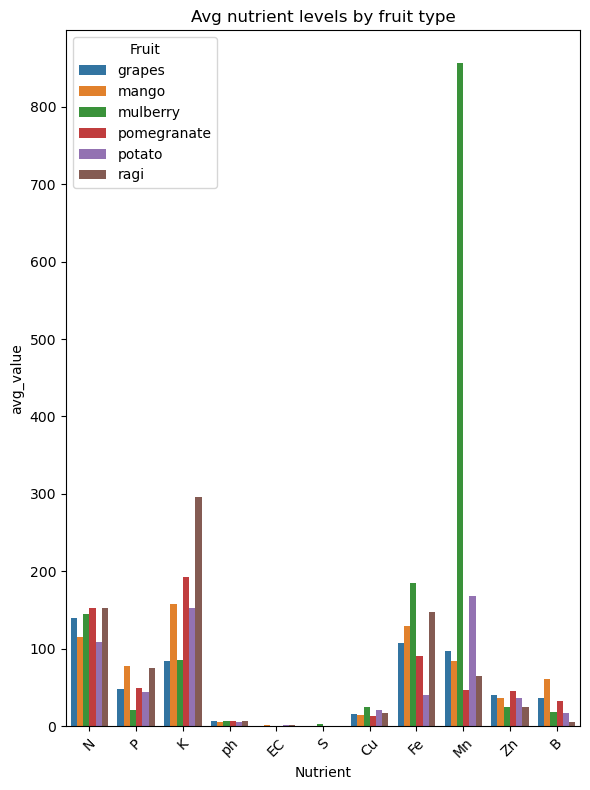

In [124]:
avg_nutrients = df.groupby('label').mean().reset_index()
avg_long = avg_nutrients.melt(id_vars='label',var_name='Nutrient',value_name='avg_value')

plt.figure(figsize=(6,8))
sns.barplot(data=avg_long, x='Nutrient',y='avg_value',hue='label')
plt.title("Avg nutrient levels by fruit type")
plt.xticks(rotation=45)
plt.xlabel("Nutrient")
plt.ylabel("avg_value")
plt.legend(title='Fruit')
plt.tight_layout()
plt.show()

#### When looked at nutrients distribtuion for each crop, we see high concentrations of Manganese(Mn)in Mulberry and Potassium(K) in Ragi. Nitrogen(N), Potassium(K), Zin(Zn) are present in most crops.